In [48]:
%pylab inline
from astropy.io import fits
import glob
import pandas as pd
from pandas import DataFrame
from scipy.interpolate import interp1d
from nirspec import divspec, gluespec
import pdb as pdb
import astropy
from astropy import units as u
from astroquery.hitran import Hitran
from flux_calculator import extract_hitran_data, calc_fluxes, extract_vup, make_rotation_diagram

Populating the interactive namespace from numpy and matplotlib


**20101213**

In [49]:
datadir='/Users/hanna/Desktop/URSI/Summer_Research/data/data/'
filelist=glob.glob(datadir+'*20101213*.fits')
for i,file in enumerate(filelist):
    filename=(file.split('/'))[-1]
    hdulist=fits.open(file)
    print(filename,hdulist[0].header['AIRMASS'],hdulist[0].header['FILNAME'],hdulist[0].header['WAVA_POS'])

data\ABAUR_20101213_1156_spec1d1.fits 1.15841 M-WIDE-AO 4.711393
data\ABAUR_20101213_1156_spec1d2.fits 1.15841 M-WIDE-AO 5.023287
data\ABAUR_20101213_1224_spec1d1.fits 1.24094 M-WIDE-AO 4.711393
data\ABAUR_20101213_1224_spec1d2.fits 1.24094 M-WIDE-AO 5.023287
data\DRTAU_20101213_0724_spec1d1.fits 1.18798 M-WIDE-AO 4.711393
data\DRTAU_20101213_0724_spec1d2.fits 1.18798 M-WIDE-AO 5.023287
data\DRTAU_20101213_0756_spec1d1.fits 1.10495 M-WIDE-AO 4.711393
data\DRTAU_20101213_0756_spec1d2.fits 1.10495 M-WIDE-AO 5.023287
data\DRTAU_20101213_0827_spec1d1.fits 1.05042 M-WIDE-AO 4.711393
data\DRTAU_20101213_0827_spec1d2.fits 1.05042 M-WIDE-AO 5.023287
data\DRTAU_20101213_0850_spec1d1.fits 1.02386 M-WIDE-AO 4.711393
data\DRTAU_20101213_0850_spec1d2.fits 1.02386 M-WIDE-AO 5.023287
data\GKTAU_20101213_0926_spec1d1.fits 1.00873 M-WIDE-AO 4.713
data\GKTAU_20101213_0926_spec1d2.fits 1.00873 M-WIDE-AO 5.023287
data\GKTAU_20101213_0948_spec1d1.fits 1.00634 M-WIDE-AO 4.711393
data\GKTAU_20101213_0948_spe

from pandas import DataFrame

numbers = {'set_of_numbers': [1,2,3,4,5,6,7,8,9,10,0,0]}
df = DataFrame(numbers,columns=['set_of_numbers'])
print (df)

df.loc[df['set_of_numbers'] == 0, 'set_of_numbers'] = 999
df.loc[df['set_of_numbers'] == 5, 'set_of_numbers'] = 555

print (df)

SNR: 28.1874094630897 21.22831835003076 7.033186293442487
Writing to:  ABAUR_HR1620_20101213_1156_M1_div.fits


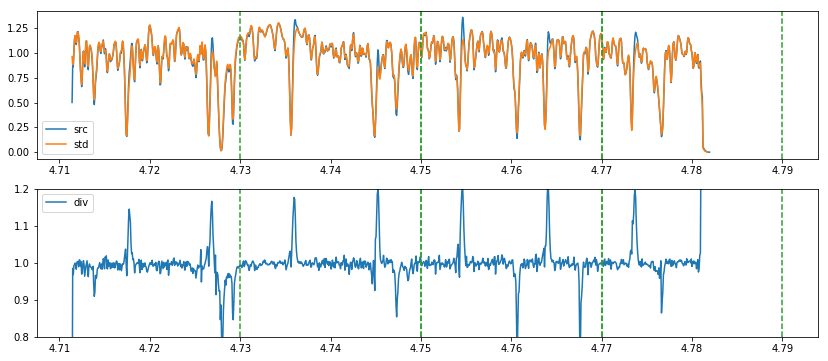

In [50]:
#20101213
srcfile='ABAUR_20101213_1156_spec1d1.fits'
stdfile='HR1620_20101213_0919_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.08, dpix=-0.2, mode='M1')

SNR: 57.45455323043106 94.47486099239393 83.67417613596555
Writing to:  ABAUR_HR1620_20101213_1156_M3_div.fits


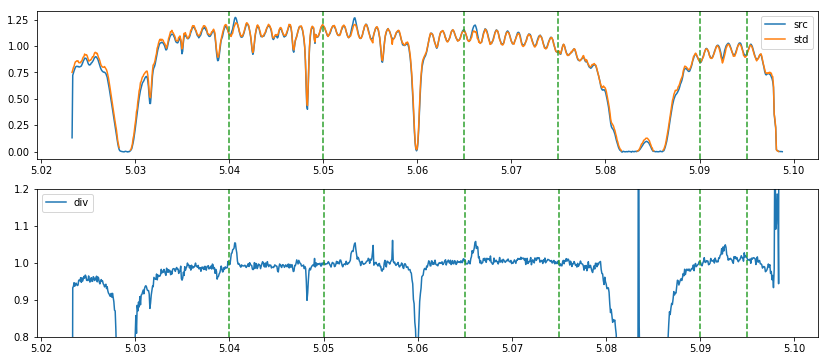

SNR: 24.92567087930182 18.414052913046117 2.262914390035311
Writing to:  ABAUR_HR1620_20101213_1224_M1_div.fits


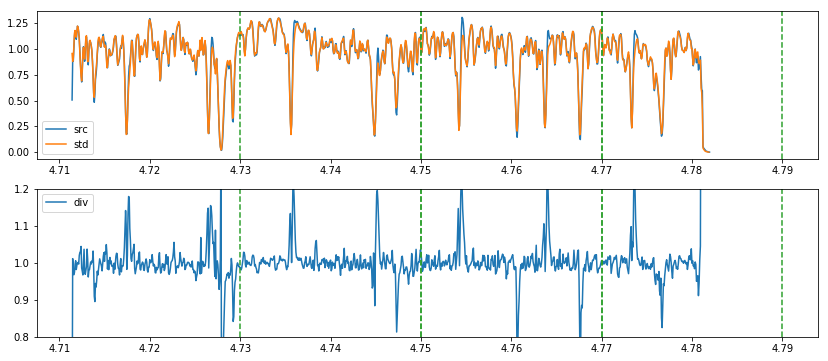

SNR: 51.45138132102897 64.3424139367356 56.792927104579675
Writing to:  ABAUR_HR1620_20101213_1224_M3_div.fits


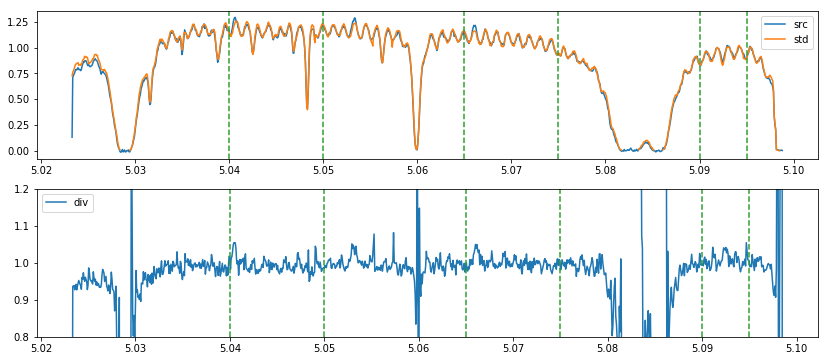

In [51]:
srcfile='ABAUR_20101213_1156_spec1d2.fits'
stdfile='HR1620_20101213_0919_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.09, dpix=-0.1, mode='M3')

srcfile='ABAUR_20101213_1224_spec1d1.fits'
stdfile='HR1620_20101213_0926_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.06, dpix=-0.3, mode='M1')

srcfile='ABAUR_20101213_1224_spec1d2.fits'
stdfile='HR1620_20101213_0926_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.21, dpix=-0.1, mode='M3')


**20101214**

In [52]:
datadir='/Users/hanna/Desktop/URSI/Summer_Research/data/data/'
filelist=glob.glob(datadir+'*20101214*.fits')
for i,file in enumerate(filelist):
    filename=(file.split('/'))[-1]
    hdulist=fits.open(file)
    print(filename,hdulist[0].header['AIRMASS'],hdulist[0].header['FILNAME'],hdulist[0].header['WAVA_POS'])

data\ABAUR_20101214_1032_spec1d1.fits 1.03489 M-WIDE-AO 4.711393
data\ABAUR_20101214_1032_spec1d2.fits 1.03489 M-WIDE-AO 5.023287
data\ABAUR_20101214_1057_spec1d1.fits 1.05918 M-WIDE-AO 4.711393
data\ABAUR_20101214_1057_spec1d2.fits 1.05918 M-WIDE-AO 5.023287
data\HD50138_20101214_1331_spec1d1.fits 1.26791 M-WIDE-AO 4.711393
data\HD50138_20101214_1331_spec1d2.fits 1.26791 M-WIDE-AO 5.023287
data\HD50138_20101214_1350_spec1d1.fits 1.33451 M-WIDE-AO 4.711393
data\HD50138_20101214_1350_spec1d2.fits 1.33451 M-WIDE-AO 5.023287
data\HR1620_20101214_0900_spec1d1.fits 1.02489 M-WIDE-AO 4.711393
data\HR1620_20101214_0900_spec1d2.fits 1.02489 M-WIDE-AO 5.023287
data\HR1620_20101214_1236_spec1d1.fits 1.2675 M-WIDE-AO 4.711393
data\HR1620_20101214_1236_spec1d2.fits 1.2675 M-WIDE-AO 5.023287
data\HR383_20101214_0459_spec1d1.fits 1.05036 M-WIDE-AO 4.711393
data\HR383_20101214_0459_spec1d2.fits 1.05036 M-WIDE-AO 5.023287
data\HR4494_20101214_1607_spec1d1.fits 1.73261 M-WIDE-AO 4.711393
data\HR4494_20

SNR: 23.524471987031614 15.202713466080441 21.55418245236198
Writing to:  ABAUR_HR1620_20101214_1032_M1_div.fits


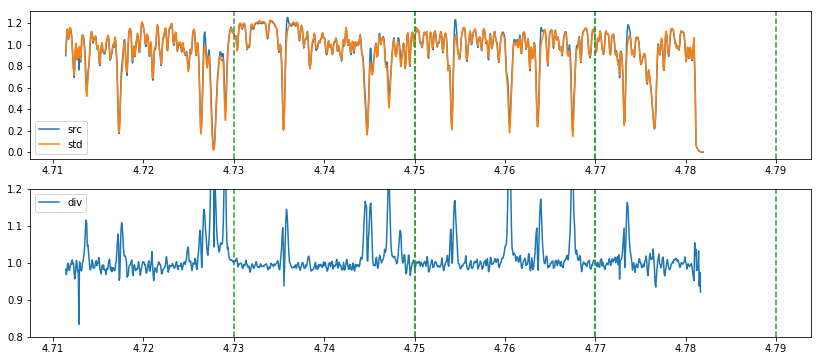

SNR: 33.11889192203591 93.03829777438298 77.1357606899407
Writing to:  ABAUR_HR1620_20101214_1032_M3_div.fits


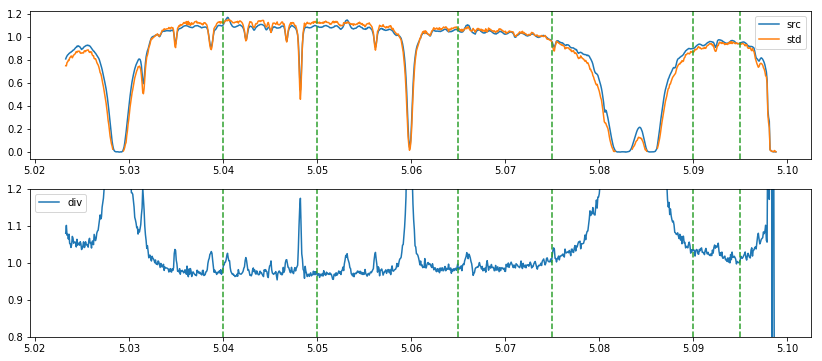

SNR: 32.49033568001675 30.73606780610209 4.735150144690452
Writing to:  ABAUR_HR383_20101214_1057_M1_div.fits


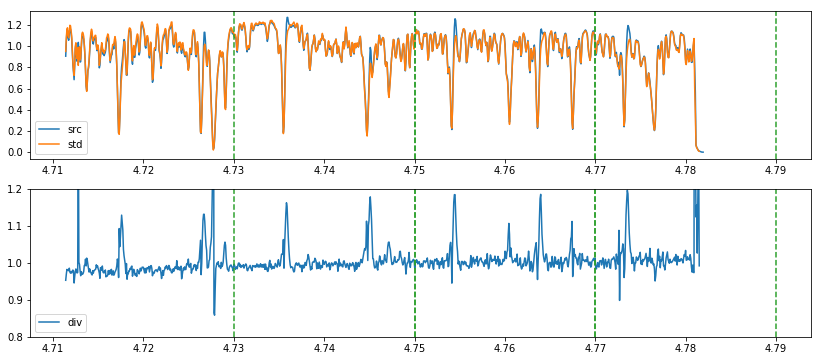

SNR: 64.81165567854448 61.151175672652315 66.11624483234696
Writing to:  ABAUR_HR383_20101214_1057_M3_div.fits


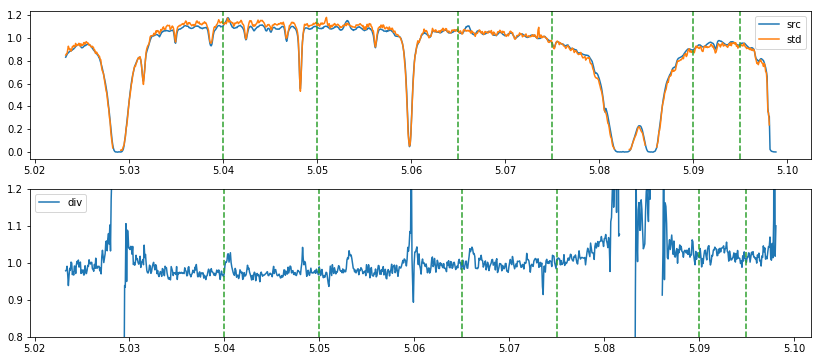

In [53]:
#20101214
srcfile='ABAUR_20101214_1032_spec1d1.fits'
stdfile='HR1620_20101214_0900_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.0, dpix=-0.1, mode='M1')

srcfile='ABAUR_20101214_1032_spec1d2.fits'
stdfile='HR1620_20101214_0900_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.00, dpix=-0.1, mode='M3')

srcfile='ABAUR_20101214_1057_spec1d1.fits'
stdfile='HR383_20101214_0459_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.01, dpix=-0.5, mode='M1')

srcfile='ABAUR_20101214_1057_spec1d2.fits'
stdfile='HR383_20101214_0459_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.01, dpix=-0.3, mode='M3')



**20121231**

In [54]:
datadir='/Users/hanna/Desktop/URSI/Summer_Research/data/data/'
filelist=glob.glob(datadir+'*20121231*.fits')
for i,file in enumerate(filelist):
    filename=(file.split('/'))[-1]
    hdulist=fits.open(file)
    print(filename,hdulist[0].header['AIRMASS'],hdulist[0].header['FILNAME'],hdulist[0].header['WAVA_POS'])

data\AATAU_20121231_0605_spec1d1.fits 1.16434 M-WIDE-AO 4.646994
data\AATAU_20121231_0605_spec1d2.fits 1.16434 M-WIDE-AO 4.954114
data\AATAU_20121231_0638_spec1d1.fits 1.08767 M-WIDE-AO 4.646994
data\AATAU_20121231_0638_spec1d2.fits 1.08767 M-WIDE-AO 4.954114
data\ABAUR_20121231_1051_spec1d1.fits 1.17909 M-WIDE-AO 4.711393
data\ABAUR_20121231_1051_spec1d2.fits 1.17909 M-WIDE-AO 5.023287
data\ABAUR_20121231_1120_spec1d1.fits 1.27035 M-WIDE-AO 4.711393
data\ABAUR_20121231_1120_spec1d2.fits 1.27035 M-WIDE-AO 5.023287
data\FNTAU_20121231_0731_spec1d1.fits 1.0164 M-WIDE-AO 4.711393
data\FNTAU_20121231_0731_spec1d2.fits 1.0164 M-WIDE-AO 5.023287
data\FNTAU_20121231_0810_spec1d1.fits 1.01305 M-WIDE-AO 4.711393
data\FNTAU_20121231_0810_spec1d2.fits 1.01305 M-WIDE-AO 5.023287
data\HR1177_20121231_0848_spec1d1.fits 1.07626 M-WIDE-AO 4.711393
data\HR1177_20121231_0848_spec1d2.fits 1.07626 M-WIDE-AO 5.023287
data\HR1620_20121231_0550_spec1d1.fits 1.31901 M-WIDE-AO 4.646994
data\HR1620_20121231_055

SNR: 19.333518015263387 20.858211916229077 13.67466304896851
Writing to:  ABAUR_HR2714_20121231_1051_M1_div.fits


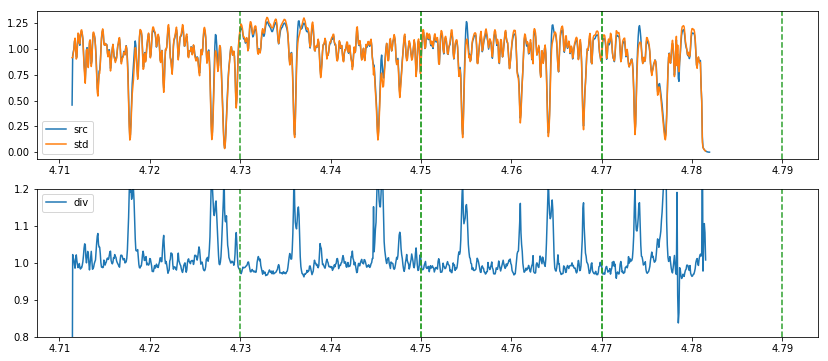

SNR: 63.09545869396841 119.51614397941377 87.22982545225463
Writing to:  ABAUR_HR2714_20121231_1051_M3_div.fits


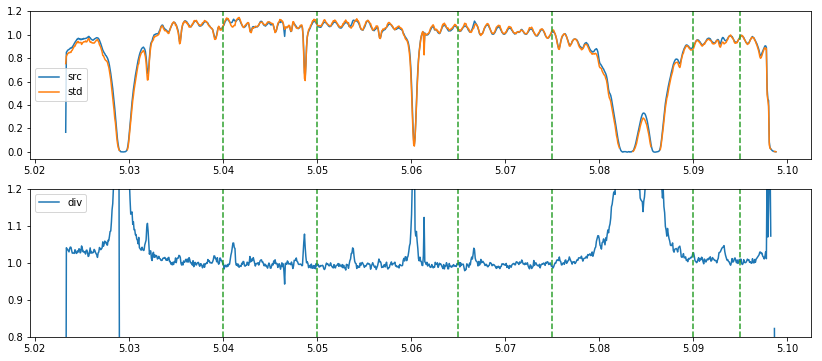

SNR: 12.95857752110088 15.124764577587172 6.852361994555833
Writing to:  ABAUR_HR4494_20121231_1120_M1_div.fits


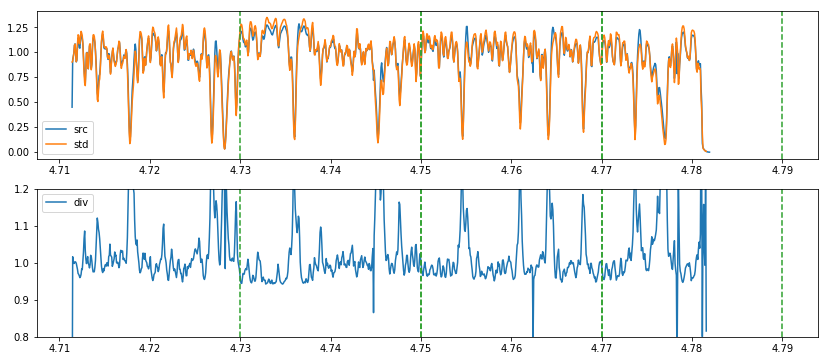

SNR: 48.23463667215806 93.10708680314926 74.7169194863943
Writing to:  ABAUR_HR4494_20121231_1120_M3_div.fits


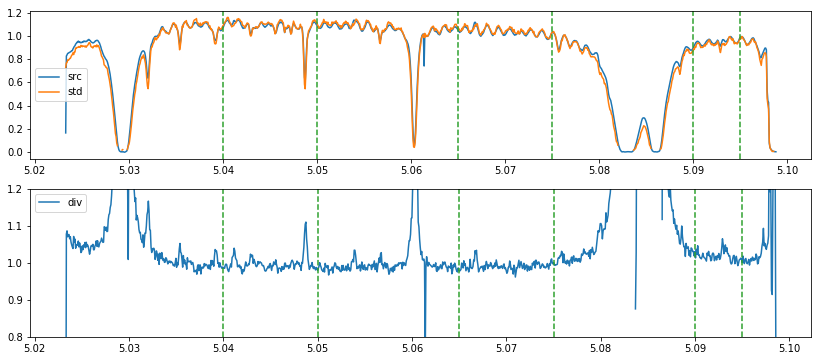

In [55]:
#20121231
srcfile='ABAUR_20121231_1051_spec1d1.fits'
stdfile='HR2714_20121231_1330_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.0, dpix=-0.0, mode='M1')

srcfile='ABAUR_20121231_1051_spec1d2.fits'
stdfile='HR2714_20121231_1330_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.0, dpix=-0.1, mode='M3')

srcfile='ABAUR_20121231_1120_spec1d1.fits'
stdfile='HR4494_20121231_1456_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.00, dpix=-0.2, mode='M1')

srcfile='ABAUR_20121231_1120_spec1d2.fits'
stdfile='HR4494_20121231_1456_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.01, dpix=-0.1, mode='M3')



**20130101**

In [56]:
datadir='/Users/hanna/Desktop/URSI/summer_research/data/data/'
filelist=glob.glob(datadir+'*20130101*.fits')
for i,file in enumerate(filelist):
    filename=(file.split('/'))[-1]
    hdulist=fits.open(file)
    print(filename,hdulist[0].header['AIRMASS'],hdulist[0].header['FILNAME'],hdulist[0].header['WAVA_POS'])

data\AATAU_20130101_0555_spec1d1.fits 1.18091 M-WIDE-AO 4.711393
data\AATAU_20130101_0555_spec1d2.fits 1.18091 M-WIDE-AO 5.023287
data\AATAU_20130101_0618_spec1d1.fits 1.11999 M-WIDE-AO 4.711393
data\AATAU_20130101_0618_spec1d2.fits 1.11999 M-WIDE-AO 5.023287
data\ABAUR_20130101_1056_spec1d1.fits 1.20446 M-WIDE-AO 4.646994
data\ABAUR_20130101_1056_spec1d2.fits 1.20446 M-WIDE-AO 4.954114
data\ABAUR_20130101_1122_spec1d1.fits 1.29239 M-WIDE-AO 4.646994
data\ABAUR_20130101_1122_spec1d2.fits 1.29239 M-WIDE-AO 4.954114
data\GMAUR_20130101_0705_spec1d1.fits 1.08204 M-WIDE-AO 4.711393
data\GMAUR_20130101_0705_spec1d2.fits 1.08204 M-WIDE-AO 5.023287
data\GMAUR_20130101_0758_spec1d1.fits 1.02657 M-WIDE-AO 4.711393
data\GMAUR_20130101_0758_spec1d2.fits 1.02657 M-WIDE-AO 5.023287
data\HR1177_20130101_0843_spec1d1.fits 1.07433 M-WIDE-AO 4.711393
data\HR1177_20130101_0843_spec1d2.fits 1.07433 M-WIDE-AO 5.023287
data\HR1620_20130101_0540_spec1d1.fits 1.34607 M-WIDE-AO 4.711393
data\HR1620_20130101_0

There is something weird about the 20130101 data onward.

[M2 = M0 , M4 = M2]

SNR: 86.09925163034339 138.83924202249972 38.82360650948827
Writing to:  ABAUR_HR1620_20130101_1056_M0_div.fits


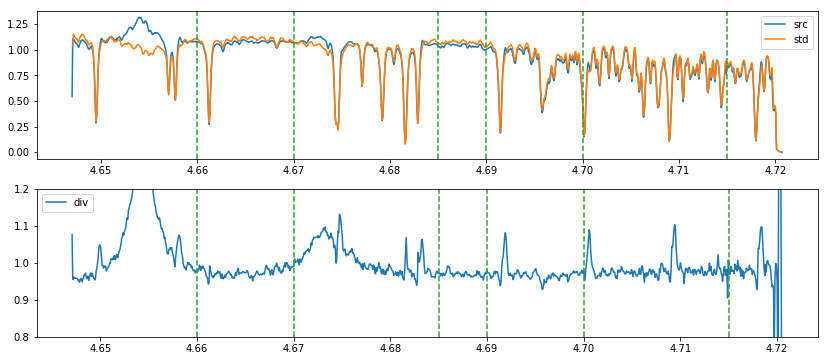

SNR: 58.857471303747595 69.36886323852862 117.24850382690343
Writing to:  ABAUR_HR1620_20130101_1056_M2_div.fits


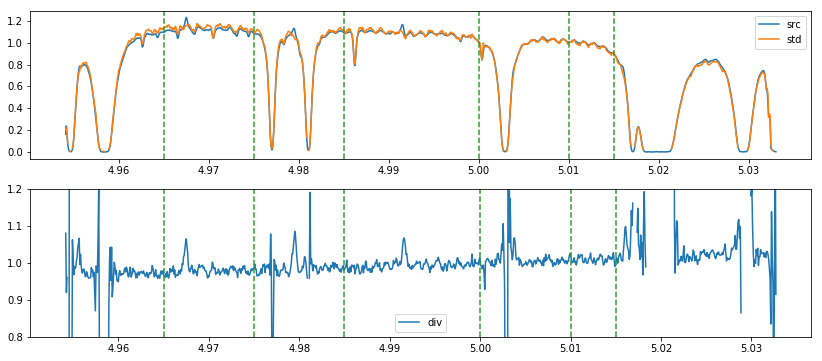

SNR: 81.75443167575388 160.98544672676155 30.305179636486805
Writing to:  ABAUR_HR2714_20130101_1122_M0_div.fits


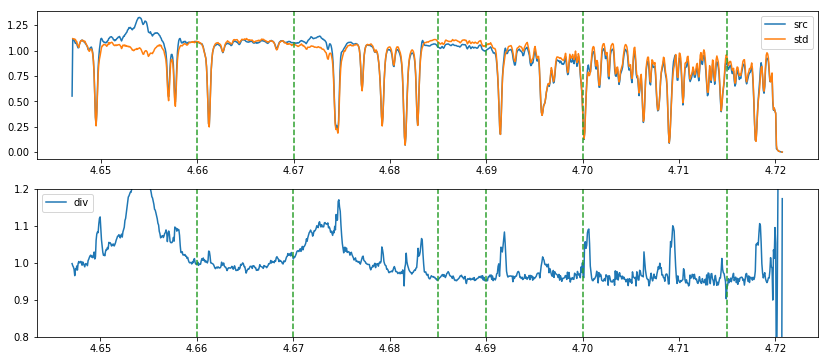

SNR: 62.51865295683898 58.34451480768278 141.02316366050232
Writing to:  ABAUR_HR2714_20130101_1122_M2_div.fits


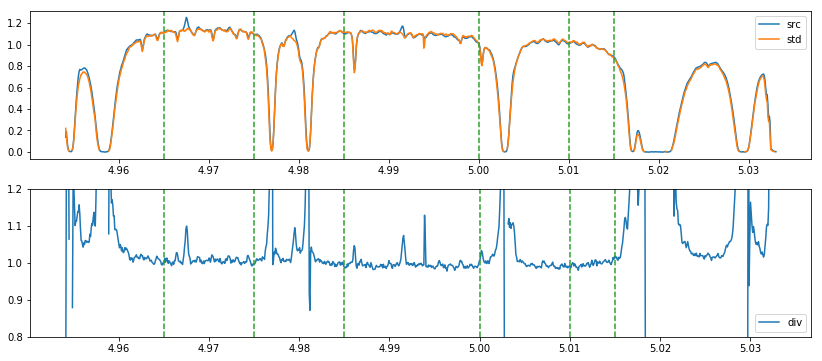

In [57]:
#20130101
srcfile='ABAUR_20130101_1056_spec1d1.fits'
stdfile='HR1620_20130101_1028_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.09, dpix=0.2, mode='M0')

srcfile='ABAUR_20130101_1056_spec1d2.fits'
stdfile='HR1620_20130101_1028_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.08, dpix=0.2, mode='M2')

srcfile='ABAUR_20130101_1122_spec1d1.fits'
stdfile='HR2714_20130101_1322_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.01, dpix=0.1, mode='M0')

srcfile='ABAUR_20130101_1122_spec1d2.fits'
stdfile='HR2714_20130101_1322_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.08, dpix=-0.2, mode='M2')



**20130103**

In [58]:
datadir='/Users/hanna/Desktop/URSI/Summer_Research/data/data/'
filelist=glob.glob(datadir+'*20130103*.fits')
for i,file in enumerate(filelist):
    filename=(file.split('/'))[-1]
    hdulist=fits.open(file)
    #print(filename,hdulist[0].header['AIRMASS'],hdulist[0].header['FILNAME'],hdulist[0].header['WAVA_POS'])

SNR: 15.901433395854594 23.10896004373396 14.343161591123376
Writing to:  ABAUR_HR1620_20130103_0837_M0_div.fits


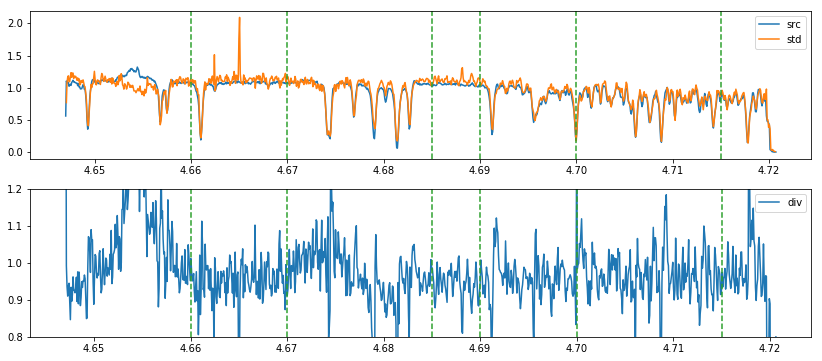

SNR: 11.336230469978883 11.716009840537547 11.839232309245416
Writing to:  ABAUR_HR1620_20130103_0837_M2_div.fits


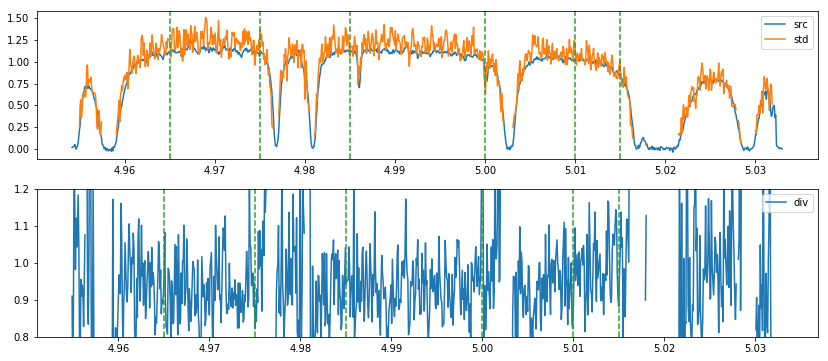

SNR: 38.72194867088361 41.43644249088446 22.172367780351568
Writing to:  ABAUR_HR1620_20130103_0913_M0_div.fits


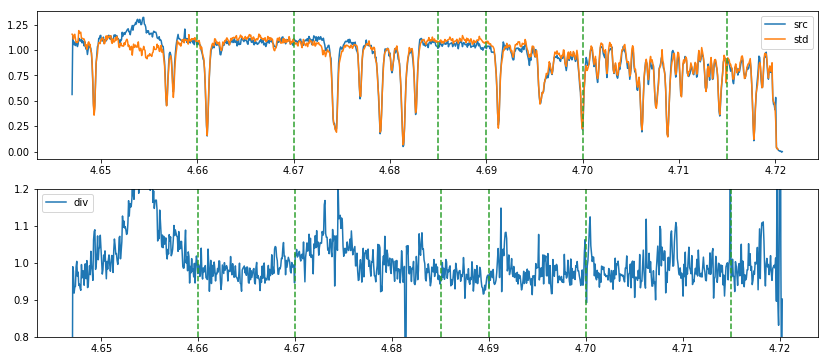

SNR: 25.27774359692319 26.189664131438484 21.72947451256646
Writing to:  ABAUR_HR1620_20130103_0913_M2_div.fits


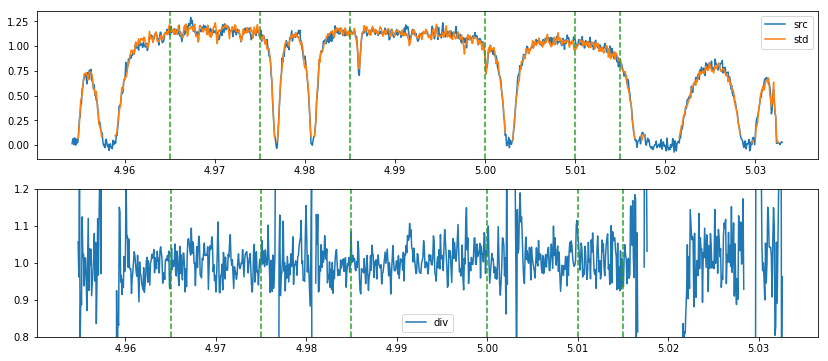

In [59]:
#20130101
srcfile='ABAUR_20130103_0837_spec1d1.fits'
stdfile='HR1620_20130103_0823_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.0, dpix=0.6, mode='M0')

srcfile='ABAUR_20130103_0837_spec1d2.fits'
stdfile='HR1620_20130103_0823_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.01, dpix=-0.9, mode='M2')

srcfile='ABAUR_20130103_0913_spec1d1.fits'
stdfile='HR1620_20130103_0718_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.02, dpix=-0.2, mode='M0')

srcfile='ABAUR_20130103_0913_spec1d2.fits'
stdfile='HR1620_20130103_0718_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.02, dpix=-0.3, mode='M2')



**20131223**

In [60]:
datadir='/Users/hanna/Desktop/URSI/Summer_Research/data/data/'
filelist=glob.glob(datadir+'*20131223*.fits')
for i,file in enumerate(filelist):
    filename=(file.split('/'))[-1]
    hdulist=fits.open(file)
    #print(filename,hdulist[0].header['AIRMASS'],hdulist[0].header['FILNAME'],hdulist[0].header['WAVA_POS'])

SNR: 4.807877232063446 100.27860506781741 7.0980751078520745
Writing to:  ABAUR_HR1177_20131223_1118_M0_div.fits


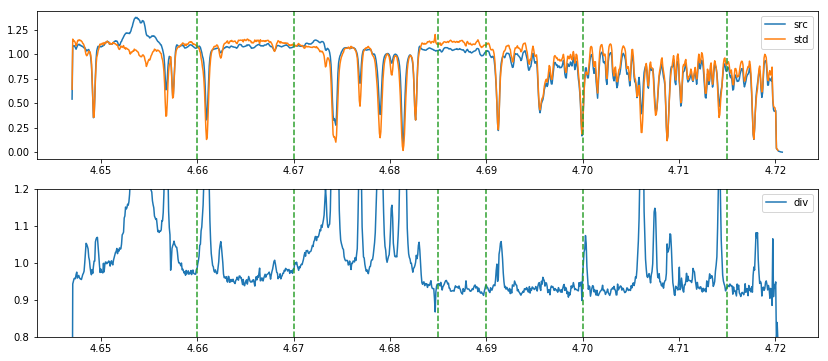

SNR: 45.27110755904315 21.004665718765846 19.87512852934553
Writing to:  ABAUR_HR1177_20131223_1118_M2_div.fits


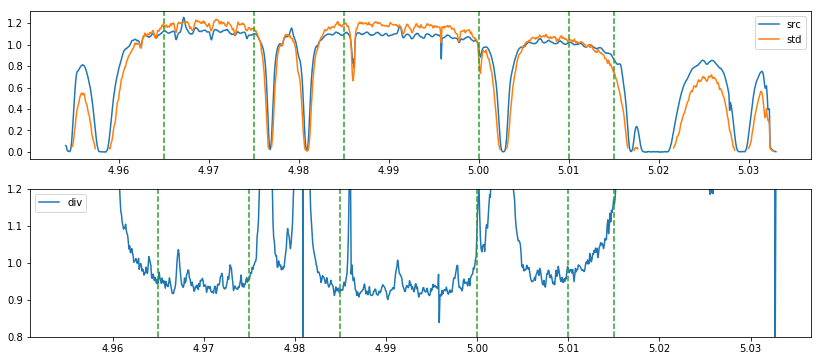

SNR: 5.633376420476319 81.98034352719355 8.204894308888809
Writing to:  ABAUR_HR1177_20131223_1136_M0_div.fits


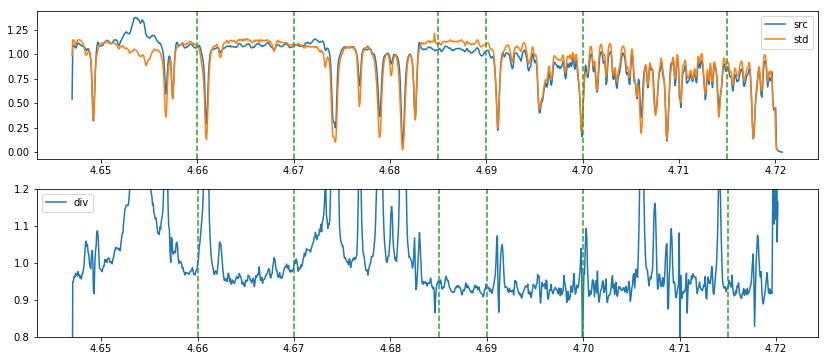

SNR: 42.23558768948475 22.45849312899007 22.096809050251736
Writing to:  ABAUR_HR1177_20131223_1136_M2_div.fits


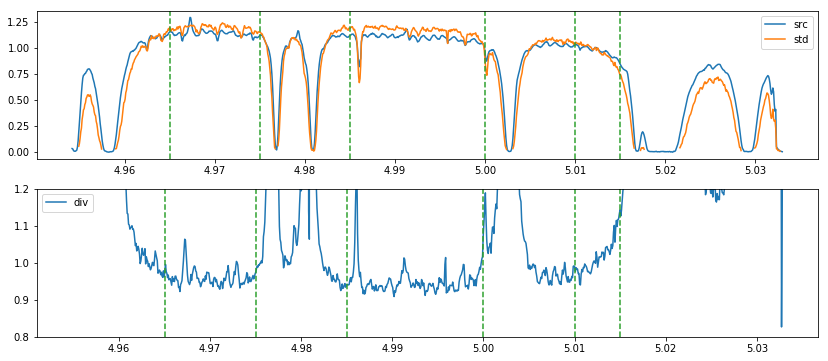

In [61]:
#20131223
srcfile='ABAUR_20131223_1118_spec1d1.fits'
stdfile='HR1177_20131223_0543_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.0, dpix=-0.1, mode='M0')

srcfile='ABAUR_20131223_1118_spec1d2.fits'
stdfile='HR1177_20131223_0543_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.01, dpix=-0.3, mode='M2')

srcfile='ABAUR_20131223_1136_spec1d1.fits'
stdfile='HR1177_20131223_0543_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.01, dpix=-0.7, mode='M0')

srcfile='ABAUR_20131223_1136_spec1d2.fits'
stdfile='HR1177_20131223_0543_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.01, dpix=-0.4, mode='M2')



**20131224**

In [62]:
datadir='/Users/hanna/Desktop/URSI/Summer_Research/data/data/'
filelist=glob.glob(datadir+'*20131224*.fits')
for i,file in enumerate(filelist):
    filename=(file.split('/'))[-1]
    hdulist=fits.open(file)
    #print(filename,hdulist[0].header['AIRMASS'],hdulist[0].header['FILNAME'],hdulist[0].header['WAVA_POS'])

SNR: 33.26814626726369 78.94901922174225 18.639171040994956
Writing to:  ABAUR_HR1177_20131224_1124_M0_div.fits


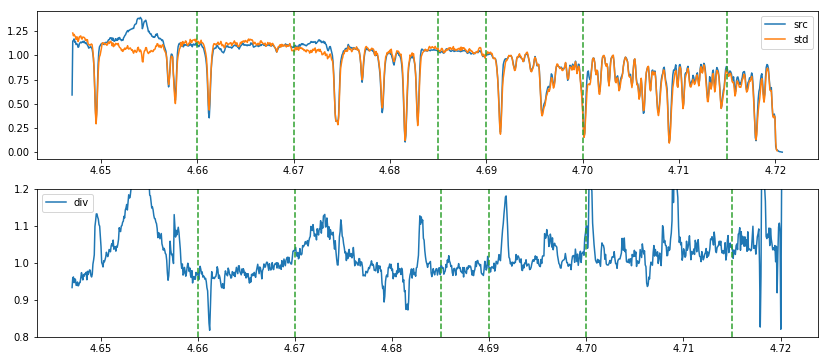

SNR: 46.7788900786587 47.52312404874959 57.43854572574266
Writing to:  ABAUR_HR1177_20131224_1124_M2_div.fits


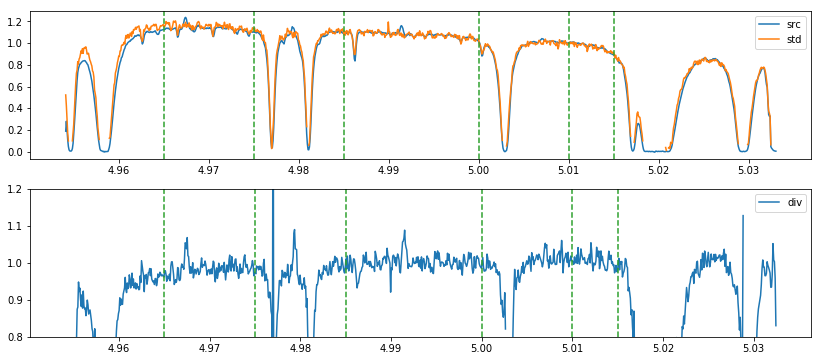

SNR: 39.011209495678784 74.91692108623563 19.165770937415637
Writing to:  ABAUR_HR1620_20131224_1143_M0_div.fits


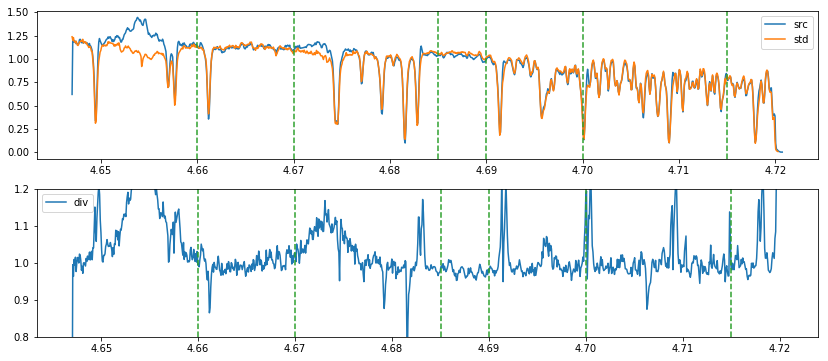

SNR: 37.22707647293925 50.97172925922181 81.95214287448862
Writing to:  ABAUR_HR1620_20131224_1143_M2_div.fits


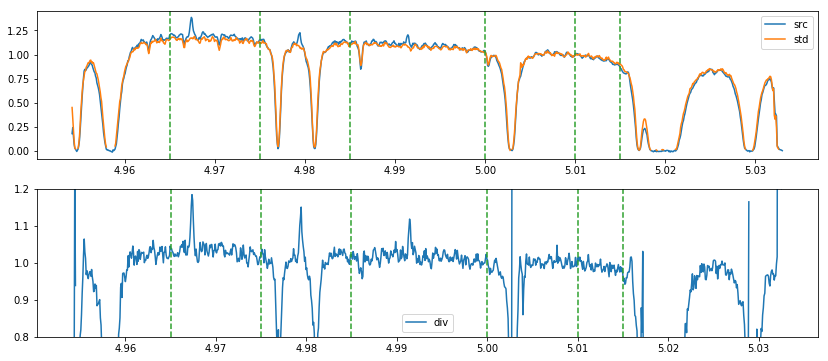

In [63]:
#20131224
srcfile='ABAUR_20131224_1124_spec1d1.fits'
stdfile='HR1177_20131224_0533_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.09, dpix=0.2, mode='M0')

srcfile='ABAUR_20131224_1124_spec1d2.fits'
stdfile='HR1177_20131224_0533_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.00, dpix=-0.1, mode='M2')

srcfile='ABAUR_20131224_1143_spec1d1.fits'
stdfile='HR1620_20131224_0638_spec1d1.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.09, dpix=-0.9, mode='M0')

srcfile='ABAUR_20131224_1143_spec1d2.fits'
stdfile='HR1620_20131224_0638_spec1d2.fits'
out=divspec(datadir, srcfile, stdfile, dtau=0.05, dpix=-0.5, mode='M2')



**Combining Spectra Together**

In [64]:
ABAUR_2010121314_files = ['ABAUR_HR1620_20101213_1156_M1_div.fits', 'ABAUR_HR1620_20101213_1156_M3_div.fits','ABAUR_HR1620_20101213_1224_M1_div.fits', 'ABAUR_HR1620_20101213_1224_M3_div.fits','ABAUR_HR1620_20101214_1032_M1_div.fits', 'ABAUR_HR1620_20101214_1032_M3_div.fits', 'ABAUR_HR383_20101214_1057_M1_div.fits', 'ABAUR_HR383_20101214_1057_M3_div.fits']
ABAUR_20121231_files = ['ABAUR_HR2714_20121231_1051_M1_div.fits', 'ABAUR_HR2714_20121231_1051_M3_div.fits', 'ABAUR_HR4494_20121231_1120_M1_div.fits', 'ABAUR_HR4494_20121231_1120_M3_div.fits']
ABAUR_2013010103_files = ['ABAUR_HR1620_20130101_1056_M0_div.fits', 'ABAUR_HR1620_20130101_1056_M2_div.fits', 'ABAUR_HR2714_20130101_1122_M0_div.fits','ABAUR_HR2714_20130101_1122_M2_div.fits','ABAUR_HR1620_20130103_0837_M0_div.fits','ABAUR_HR1620_20130103_0837_M2_div.fits','ABAUR_HR1620_20130103_0913_M0_div.fits','ABAUR_HR1620_20130103_0913_M2_div.fits']
ABAUR_2013122324_files = ['ABAUR_HR1177_20131223_1118_M0_div.fits','ABAUR_HR1177_20131223_1118_M2_div.fits','ABAUR_HR1177_20131223_1136_M0_div.fits','ABAUR_HR1177_20131223_1136_M2_div.fits','ABAUR_HR1177_20131224_1124_M0_div.fits','ABAUR_HR1177_20131224_1124_M2_div.fits','ABAUR_HR1620_20131224_1143_M0_div.fits','ABAUR_HR1620_20131224_1143_M2_div.fits']

In [66]:
(wave,div)=gluespec('/Users/hanna/Desktop/URSI/Summer_Research/',ABAUR_2010121314_files)
(wave,div)=gluespec('/Users/hanna/Desktop/URSI/Summer_Research/',ABAUR_20121231_files)
(wave,div)=gluespec('/Users/hanna/Desktop/URSI/Summer_Research/',ABAUR_2013010103_files)
(wave,div)=gluespec('/Users/hanna/Desktop/URSI/Summer_Research/',ABAUR_2013122324_files)

Writing to:  ABAUR_20101213_glue.fits
Writing to:  ABAUR_20121231_glue.fits
Writing to:  ABAUR_20130101_glue.fits
Writing to:  ABAUR_20131223_glue.fits


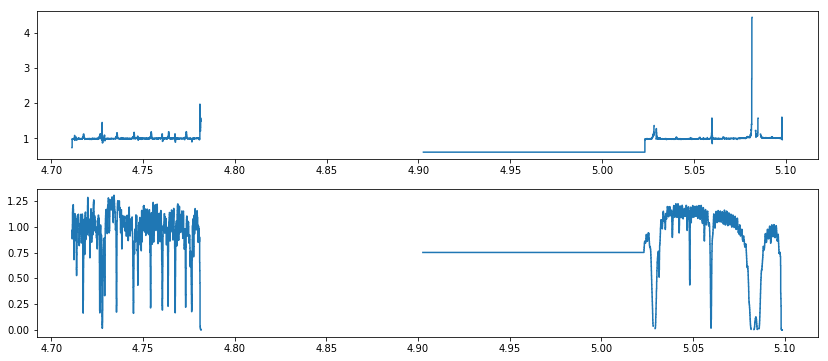

In [67]:
hdulist=fits.open('/Users/hanna/Desktop/URSI/Summer_Research/ABAUR_20101213_glue.fits')
data=hdulist[1].data
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

ax1.plot(data['wave'],data['div'],linestyle='steps-mid')
ax2.plot(data['wave'],data['std'],linestyle='steps-mid')

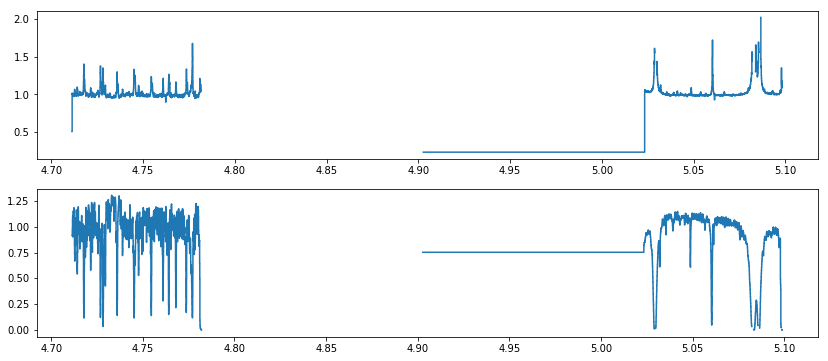

In [68]:
hdulist=fits.open('/Users/hanna/Desktop/URSI/Summer_Research/ABAUR_20121231_glue.fits')
data=hdulist[1].data
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

ax1.plot(data['wave'],data['div'],linestyle='steps-mid')
ax2.plot(data['wave'],data['std'],linestyle='steps-mid')

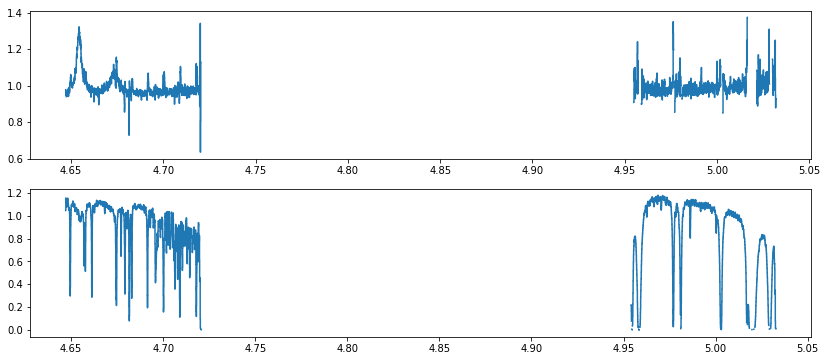

In [70]:
hdulist=fits.open('/Users/hanna/Desktop/URSI/Summer_Research/ABAUR_20130101_glue.fits')
data=hdulist[1].data
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

ax1.plot(data['wave'],data['div'],linestyle='steps-mid')
ax2.plot(data['wave'],data['std'],linestyle='steps-mid')

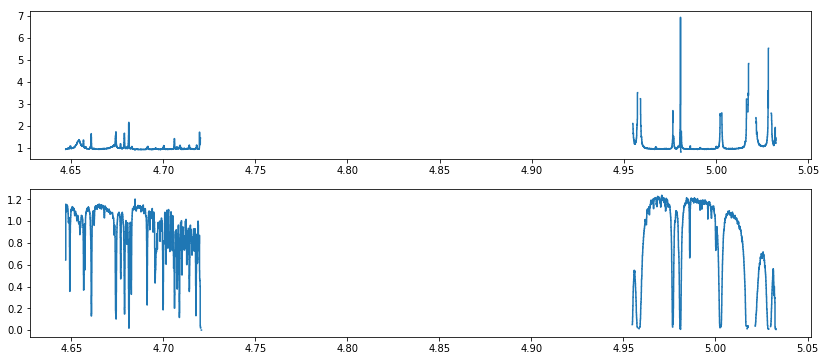

In [71]:
hdulist=fits.open('/Users/hanna/Desktop/URSI/Summer_Research/ABAUR_20131223_glue.fits')
data=hdulist[1].data
fig=plt.figure(figsize=(14,6))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

ax1.plot(data['wave'],data['div'],linestyle='steps-mid')
ax2.plot(data['wave'],data['std'],linestyle='steps-mid')